In [146]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pprint import pprint
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen import Spin
import matplotlib.pyplot as plt

from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.analysis.diffraction import xrd
import numpy as np

with MPRester("UTLDwneEpLqJ3EtR") as m:
    bandStructure = m.get_bandstructure_by_material_id("mp-757100")


bandsPlot = BSPlotter(bandStructure)
#bandsPlot.show()

bandGap = bandStructure.get_band_gap()
print("Comme nous verrons plus tard, la première bande de conduction a un index k-point de 95 et cela correspond donc bien à la branche B-Z et pas celui de la branche P1-Z")
print()
print("Nous avons donc une bande interdite "+ ("directe" if (bandGap['direct']) else "indirecte") +" reportée sur l'image ci-dessous. ")
print("Avec une énergie de " + str(round(bandGap['energy'], 4)) + "eV")

Comme nous verrons plus tard, la première bande de conduction a un index k-point de 95 et cela correspond donc bien à la branche B-Z et pas celui de la branche P1-Z

Nous avons donc une bande interdite indirecte reportée sur l'image ci-dessous. 
Avec une énergie de 0.6836eV


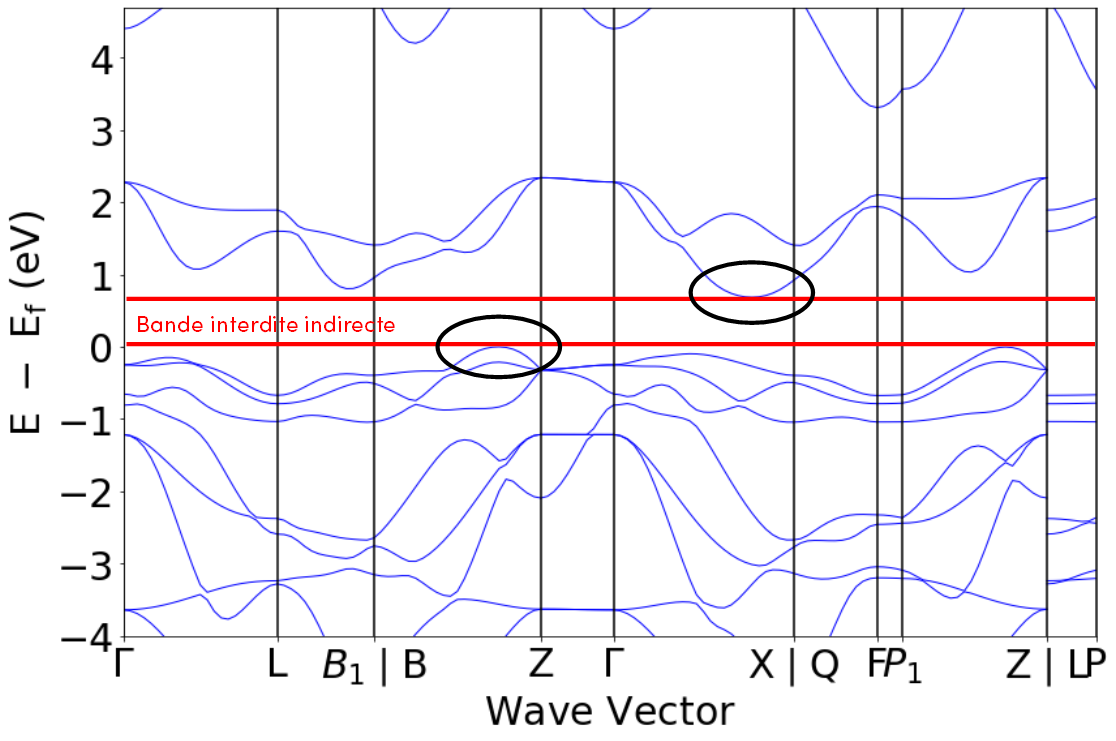

In [147]:


valenceBand = bandStructure.get_vbm()
print("Pour la bande de valence nous avons : ")
print(valenceBand)
print("---")
conductionBand = bandStructure.get_cbm()
print("Pour la bande de conduction nous avons : ")
print(conductionBand)
print("---")
print("Les deux vbm et cdm sont respectivement les bandes 11 et 12 avec indes kpoint de 56 et 95.")

print("Les bandes " + ("sont polarisées" if (bandStructure.is_spin_polarized) else "ne sont pas polarisées") + ". Toutes les valeurs se trouvent donc dans le tableau Spin.up. ")
print("---")


k = list()
for kpoint in bandStructure.kpoints:
    k.append(sum(kpoint.frac_coords *  kpoint.frac_coords))


Pour la bande de valence nous avons : 
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}), 'kpoint_index': [56], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7feb8b0f0fd0>, 'energy': 3.9385, 'projections': {}}
---
Pour la bande de conduction nous avons : 
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [95], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7feb8817e1d0>, 'energy': 4.6221, 'projections': {}}
---
Les deux vbm et cdm sont respectivement les bandes 11 et 12 avec indes kpoint de 56 et 95.
Les bandes ne sont pas polarisées. Toutes les valeurs se trouvent donc dans le tableau Spin.up. 
---


In [148]:
#valeurs bande de valence
valenceBandValues = bandStructure.bands[Spin.up][11, :]

maxv = list()
maxi = list()
minv = list()
mini = list()

for i in range(1,20):
    values = [(e-ee)/(k-kk) for e, ee,k, kk in zip(valenceBandValues[:-i], valenceBandValues[i:], k[:-i], k[i:])]
    maxHere = max(values)
    minHere = min(values)
    maxv.append(maxHere)
    maxi.append(values.index(maxHere))
    minv.append(minHere)
    mini.append(values.index(maxHere))

print("BANDE DE VALENCE")
print("Dispersion maximale à l'index = " + str(maxi[maxv.index(max(maxv))]))
print("Branche " + str(bandStructure.get_branch(maxi[maxv.index(max(maxv))])))
print("Direction " + str(bandStructure.kpoints[maxi[maxv.index(max(maxv))]]))
print("")
print("Dispersion minimale à l'index = " + str(mini[minv.index(max(minv))]))
print("Branche " + str(bandStructure.get_branch(mini[minv.index(max(minv))])))
print("Direction " + str(bandStructure.kpoints[mini[minv.index(max(minv))]]))
print("")


BANDE DE VALENCE
Dispersion maximale à l'index = 134
Branche [{'name': 'P_1-Z', 'start_index': 120, 'end_index': 141, 'index': 134}]
Direction [0.55274949 0.55274949 0.39450102] [ 0.5524185  0.        -0.2523215] None

Dispersion minimale à l'index = 59
Branche [{'name': 'B-Z', 'start_index': 38, 'end_index': 62, 'index': 59}]
Direction [0.53956212 0.5        0.46043788] [ 0.51946981 -0.07272344 -0.04498878] None



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [152]:

#valeurs bande de conduction
conductionBandValues = bandStructure.bands[Spin.up][12, :]

maxv = list()
maxi = list()
minv = list()
mini = list()

                                               
for i in range(1,20):
    values = [(e-ee)/(k-kk) for e, ee,k, kk in zip(conductionBandValues[:-i], conductionBandValues[i:], k[:-i], k[i:])]
    maxHere = max(values)
    minHere = min(values)
    maxv.append(maxHere)
    maxi.append(values.index(maxHere))
    minv.append(minHere)
    mini.append(values.index(maxHere))
                                               
print("BANDE DE CONDUCTION")
print("Dispersion maximale à l'index = " + str(maxi[maxv.index(max(maxv))]))
print("Branche " + str(bandStructure.get_branch(maxi[maxv.index(max(maxv))])))
print("Direction " + str(bandStructure.kpoints[maxi[maxv.index(max(maxv))]]))
print("")
print("Dispersion minimale à l'index = " + str(mini[minv.index(max(minv))]))
print("Branche " + str(bandStructure.get_branch(mini[minv.index(max(minv))])))
print("Direction " + str(bandStructure.kpoints[mini[minv.index(max(minv))]]))



BANDE DE CONDUCTION
Dispersion maximale à l'index = 118
Branche [{'name': 'F-P_1', 'start_index': 115, 'end_index': 119, 'index': 118}]
Direction [0.61868635 0.61868635 0.1376273 ] [ 0.61831587  0.         -0.93563891] None

Dispersion minimale à l'index = 72
Branche [{'name': 'Z-\\Gamma', 'start_index': 63, 'end_index': 74, 'index': 72}]
Direction [0.09090909 0.09090909 0.09090909] [0.09085465 0.         0.01443834] None


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
